### Checks that turning off certain tracer tendencies does not impact the simulation for bichan

In [1]:
#Packages 
import numpy as np
import xarray as xr
import glob
import cmocean.cm as cmo
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
warnings.filterwarnings("ignore") #turns off annoying warnings
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter
import mosaic
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Choose one root directory, useful for multiple resolutions
rootdir = '/pscratch/sd/d/dylan617/bichan/mpaso/5km_nonlocal/'

# Load datasets, tendencies disabled
dso = xr.open_dataset(rootdir + 'output_disable.nc', chunks={'Time': 1}).isel(Time=slice(1, None))
dsg = xr.open_dataset(rootdir + 'channel_5km_init.nc')

# Load datasets, tendencies enabled 
dso1 = xr.open_dataset(rootdir + 'output_enable.nc', chunks={'Time': 1}).isel(Time=slice(1, None))

Confirm that disabling the following tracer tendencies does NOT affect the simulation dynamics. Bichan has no surface tracer fluxes, explicit lateral mixing applied to tracers, and no destabilizing buoyancy forcing. So, these flags being turned off should not influence the simulation 
```
    config_disable_tr_all_tend = .false.
    config_disable_tr_adv = .false.
    config_disable_tr_hmix = .true.
    config_disable_tr_vmix = .false.
    config_disable_tr_sflux = .true.
    config_disable_tr_nonlocalflux = .true.
    config_disable_redi_k33 = .false.
    config_read_nearest_restart = .false.
```

In [3]:
print(dso.attrs['config_disable_tr_nonlocalflux'])
print(dso.attrs['config_disable_tr_sflux'])
print(dso.attrs['config_disable_tr_hmix'])

print(dso1.attrs['config_disable_tr_nonlocalflux'])
print(dso1.attrs['config_disable_tr_sflux'])
print(dso1.attrs['config_disable_tr_hmix'])

YES
YES
YES
NO
NO
NO


In [4]:
dso1

<xarray.Dataset> Size: 870MB
Dimensions:                    (Time: 360, nCells: 920, nVertLevels: 50,
                                nVertLevelsP1: 51)
Dimensions without coordinates: Time, nCells, nVertLevels, nVertLevelsP1
Data variables: (12/18)
    xtime                      (Time) |S64 23kB dask.array<chunksize=(1,), meta=np.ndarray>
    layerThickness             (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    ssh                        (Time, nCells) float32 1MB dask.array<chunksize=(1, 920), meta=np.ndarray>
    vertDiffTopOfCell          (Time, nCells, nVertLevelsP1) float32 68MB dask.array<chunksize=(1, 920, 51), meta=np.ndarray>
    vertViscTopOfCell          (Time, nCells, nVertLevelsP1) float32 68MB dask.array<chunksize=(1, 920, 51), meta=np.ndarray>
    vertVelocityTop            (Time, nCells, nVertLevelsP1) float32 68MB dask.array<chunksize=(1, 920, 51), meta=np.ndarray>
    ...                         ...
    temperature                (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    salinity                   (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveTemperature         (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveSalinity            (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveTemperatureSquared  (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveSalinitySquared     (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
Attributes: (12/1353)
    model_name:                                                      mpas
    core_name:                                                       ocean
    source:                                                          MPAS
    Conventions:                                                     MPAS
    git_version:                                                     unknown
    on_a_sphere:                                                     NO
    ...                                                              ...
    config_rx1_slope_weight:                                         0.1
    config_rx1_zstar_weight:                                         1.0
    config_rx1_horiz_smooth_open_ocean_cells:                        20
    config_rx1_min_levels:                                           3
    config_rx1_min_layer_thickness:                                  1.0
    file_id:                                                         v08y50j4tz

In [5]:
dso

<xarray.Dataset> Size: 870MB
Dimensions:                    (Time: 360, nCells: 920, nVertLevels: 50,
                                nVertLevelsP1: 51)
Dimensions without coordinates: Time, nCells, nVertLevels, nVertLevelsP1
Data variables: (12/18)
    xtime                      (Time) |S64 23kB dask.array<chunksize=(1,), meta=np.ndarray>
    layerThickness             (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    ssh                        (Time, nCells) float32 1MB dask.array<chunksize=(1, 920), meta=np.ndarray>
    vertDiffTopOfCell          (Time, nCells, nVertLevelsP1) float32 68MB dask.array<chunksize=(1, 920, 51), meta=np.ndarray>
    vertViscTopOfCell          (Time, nCells, nVertLevelsP1) float32 68MB dask.array<chunksize=(1, 920, 51), meta=np.ndarray>
    vertVelocityTop            (Time, nCells, nVertLevelsP1) float32 68MB dask.array<chunksize=(1, 920, 51), meta=np.ndarray>
    ...                         ...
    temperature                (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    salinity                   (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveTemperature         (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveSalinity            (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveTemperatureSquared  (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
    passiveSalinitySquared     (Time, nCells, nVertLevels) float32 66MB dask.array<chunksize=(1, 920, 50), meta=np.ndarray>
Attributes: (12/1353)
    model_name:                                                      mpas
    core_name:                                                       ocean
    source:                                                          MPAS
    Conventions:                                                     MPAS
    git_version:                                                     unknown
    on_a_sphere:                                                     NO
    ...                                                              ...
    config_rx1_slope_weight:                                         0.1
    config_rx1_zstar_weight:                                         1.0
    config_rx1_horiz_smooth_open_ocean_cells:                        20
    config_rx1_min_levels:                                           3
    config_rx1_min_layer_thickness:                                  1.0
    file_id:                                                         4r5dtsnq34

### Check relative vorticity, kinetic energy, and the tracers 

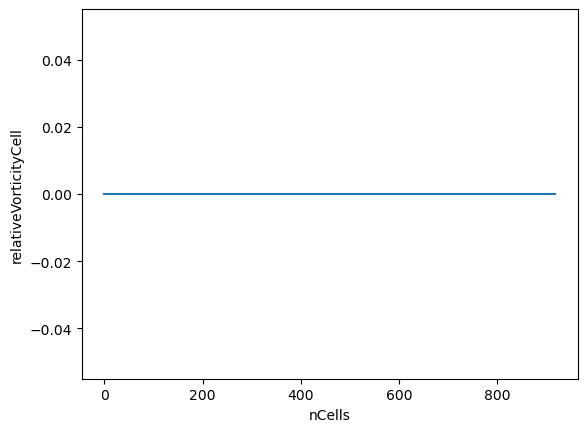

In [6]:
(dso1.relativeVorticityCell[-1,:,0]-dso.relativeVorticityCell[-1,:,0]).plot()

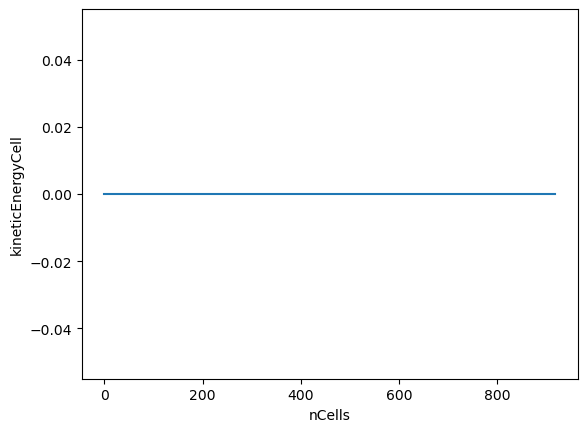

In [7]:
(dso1.kineticEnergyCell[-1,:,0]-dso.kineticEnergyCell[-1,:,0]).plot()

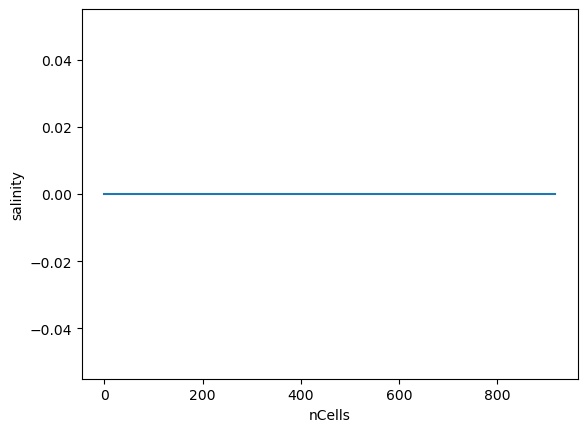

In [8]:
(dso1.salinity[-1,:,0]-dso.salinity[-1,:,0]).plot()

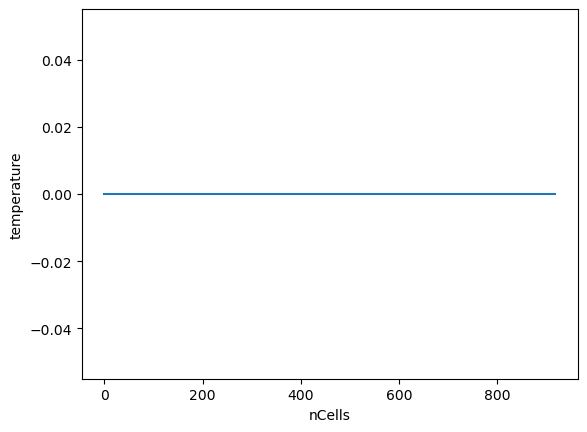

In [9]:
(dso1.temperature[-1,:,0]-dso.temperature[-1,:,0]).plot()

### All good as expected 